<a href="https://colab.research.google.com/github/ritwiks9635/CNN_Project_File/blob/main/Fruit__Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**https://www.kaggle.com/datasets/sshikamaru/fruit-recognition**🍇🍈🍉🍊🍋🍌🍍🥭🍎🍏🍐🍑🍒🍓🥝🥥

In [ ]:
! unzip /content/https:/www.kaggle.com/datasets/sshikamaru/fruit-recognition/fruit-recognition.zip

In [36]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

In [4]:
data = pd.read_csv("/content/sampleSubmission.csv")
data.head()

,id,label
0,0,Apple Braeburn
1,1,Apple Braeburn
2,2,Apple Braeburn
3,3,Apple Braeburn
4,4,Apple Braeburn


In [5]:
train_dir = "/content/train/train"
test_dir = "/content/test/test"

In [6]:
name_of_frouts = os.listdir(train_dir)
name_of_frouts

['Papaya',
 'Lemon',
 'Plum',
 'Pear',
 'Clementine',
 'Onion White',
 'Cactus fruit',
 'Apple Granny Smith',
 'Orange',
 'Peach',
 'Blueberry',
 'Apple Braeburn',
 'Pineapple',
 'Limes',
 'Watermelon',
 'Strawberry',
 'Pepper Green',
 'Grape Blue',
 'Avocado',
 'Passion Fruit',
 'Corn',
 'Mango',
 'Raspberry',
 'Tomato',
 'Pepper Red',
 'Cantaloupe',
 'Apricot',
 'Cherry',
 'Pomegranate',
 'Potato Red',
 'Banana',
 'Cucumber Ripe',
 'Kiwi']

In [7]:
len(os.listdir(train_dir))

33

In [8]:
for f in name_of_frouts:
  path = os.path.join(train_dir, f)
  count = (f"label{f}::", len(os.listdir(path)))
  print(count)

('labelPapaya::', 492)
('labelLemon::', 492)
('labelPlum::', 447)
('labelPear::', 696)
('labelClementine::', 490)
('labelOnion White::', 438)
('labelCactus fruit::', 490)
('labelApple Granny Smith::', 492)
('labelOrange::', 479)
('labelPeach::', 492)
('labelBlueberry::', 462)
('labelApple Braeburn::', 492)
('labelPineapple::', 490)
('labelLimes::', 490)
('labelWatermelon::', 475)
('labelStrawberry::', 492)
('labelPepper Green::', 444)
('labelGrape Blue::', 984)
('labelAvocado::', 427)
('labelPassion Fruit::', 490)
('labelCorn::', 450)
('labelMango::', 490)
('labelRaspberry::', 490)
('labelTomato::', 738)
('labelPepper Red::', 666)
('labelCantaloupe::', 492)
('labelApricot::', 492)
('labelCherry::', 492)
('labelPomegranate::', 492)
('labelPotato Red::', 450)
('labelBanana::', 490)
('labelCucumber Ripe::', 392)
('labelKiwi::', 466)


In [9]:
d = (os.listdir(path)[0])
d = os.path.join(path,d)
d = tf.keras.utils.load_img(d)
d = tf.keras.utils.img_to_array(d)
d.shape

(100, 100, 3)

In [10]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_gen = ImageDataGenerator(
    rescale = 1./255.,
    zoom_range = 0.2,
    shear_range = 0.2,
    horizontal_flip = True,
    vertical_flip = True,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    rotation_range = 40,
    validation_split = 0.2)
test_gen = ImageDataGenerator(rescale = 1./255)

In [11]:
train_data = train_gen.flow_from_directory(
    train_dir,
    subset="training",
    target_size = (100,100),
    batch_size = 64,
    class_mode = "categorical",
    shuffle = True)


val_data = train_gen.flow_from_directory(
    train_dir,
    subset="validation",
    target_size = (100,100),
    batch_size = 64,
    class_mode = "categorical",
    shuffle = True)

Found 13493 images belonging to 33 classes.
Found 3361 images belonging to 33 classes.


In [12]:
labels = train_data.class_indices
classes = list(labels.keys())
classes

['Apple Braeburn',
 'Apple Granny Smith',
 'Apricot',
 'Avocado',
 'Banana',
 'Blueberry',
 'Cactus fruit',
 'Cantaloupe',
 'Cherry',
 'Clementine',
 'Corn',
 'Cucumber Ripe',
 'Grape Blue',
 'Kiwi',
 'Lemon',
 'Limes',
 'Mango',
 'Onion White',
 'Orange',
 'Papaya',
 'Passion Fruit',
 'Peach',
 'Pear',
 'Pepper Green',
 'Pepper Red',
 'Pineapple',
 'Plum',
 'Pomegranate',
 'Potato Red',
 'Raspberry',
 'Strawberry',
 'Tomato',
 'Watermelon']

In [13]:
x, y = next(train_data)

In [14]:
def show_img(img, lab):
  plt.figure(figsize=(15, 10))
  for i in range(40):
    plt.subplot(8, 5, i+1)
    plt.imshow(img[i])
    plt.title(classes[np.argmax(lab[i])])
    plt.axis("off")

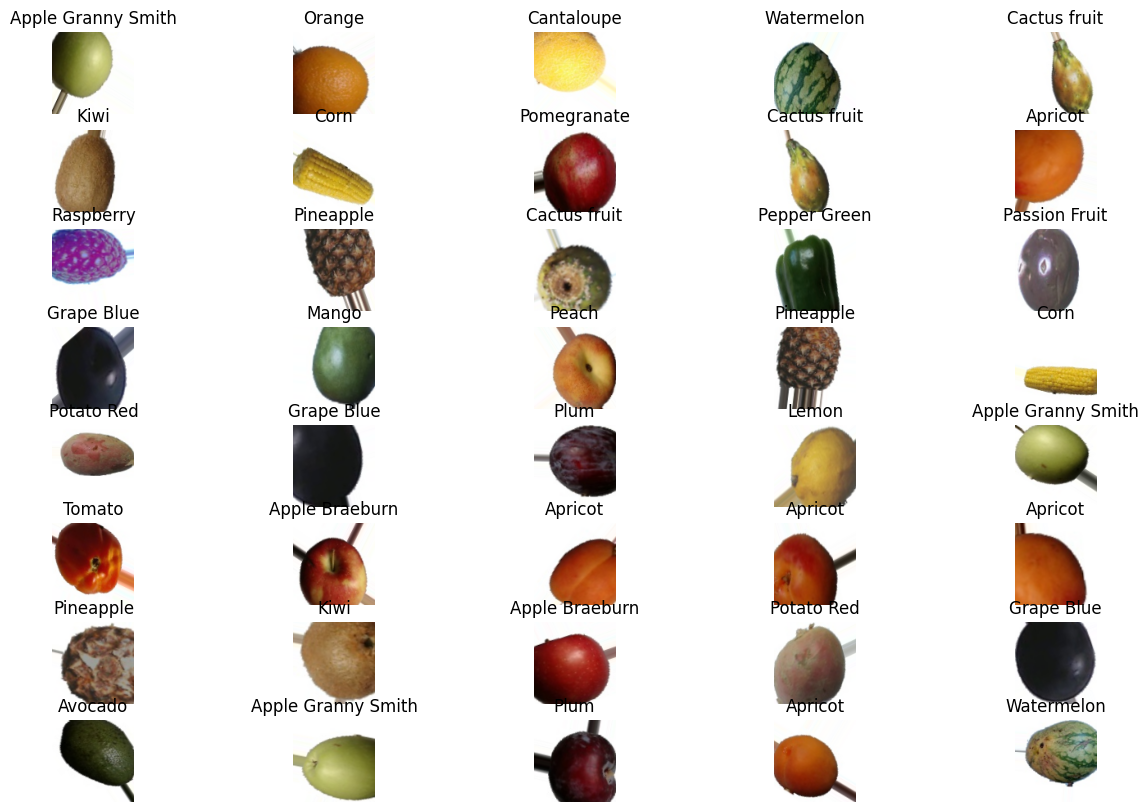

In [15]:
show_img(x, y)

In [16]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation = "relu", input_shape = (100, 100, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation = "relu"),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation = "relu"),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation = "relu"),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(512, activation = "relu"),
    tf.keras.layers.Dense(len(classes), activation = "softmax")
    ])

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 98, 98, 16)        448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 49, 49, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 47, 47, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 23, 23, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 21, 21, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 10, 10, 64)       0

In [18]:
model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 0.0001),
    loss = "categorical_crossentropy", metrics = ["accuracy"])

In [19]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

In [20]:
e_s = EarlyStopping(patience = 3, restore_best_weights = True)
m_c = ModelCheckpoint("base_model.h5", save_best_only = True)

In [28]:
history = model.fit(train_data, validation_data = val_data, epochs = 50, callbacks = [e_s, m_c])

Epoch 1/50
211/211 [==============================] - 49s 234ms/step - loss: 0.0749 - accuracy: 0.9748 - val_loss: 0.0913 - val_accuracy: 0.9655
Epoch 2/50
211/211 [==============================] - 50s 239ms/step - loss: 0.0701 - accuracy: 0.9759 - val_loss: 0.0443 - val_accuracy: 0.9854
Epoch 3/50
211/211 [==============================] - 50s 236ms/step - loss: 0.0709 - accuracy: 0.9747 - val_loss: 0.0534 - val_accuracy: 0.9795
Epoch 4/50
211/211 [==============================] - 50s 238ms/step - loss: 0.0653 - accuracy: 0.9764 - val_loss: 0.0548 - val_accuracy: 0.9798
Epoch 5/50
211/211 [==============================] - 49s 230ms/step - loss: 0.0665 - accuracy: 0.9757 - val_loss: 0.0334 - val_accuracy: 0.9887
Epoch 6/50
211/211 [==============================] - 49s 231ms/step - loss: 0.0633 - accuracy: 0.9784 - val_loss: 0.0474 - val_accuracy: 0.9830
Epoch 7/50
211/211 [==============================] - 49s 231ms/step - loss: 0.0623 - accuracy: 0.9781 - val_loss: 0.0445 - val_ac

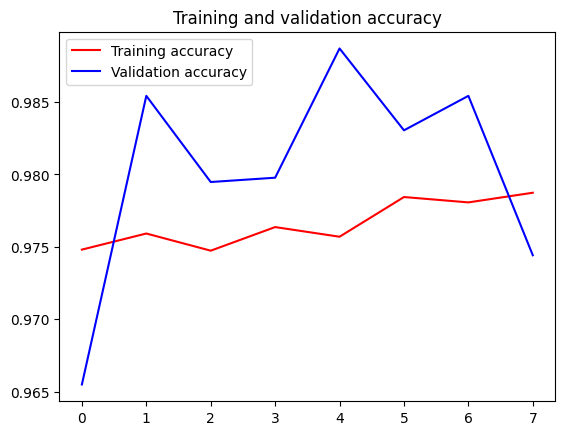

<Figure size 640x480 with 0 Axes>

In [29]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()

2/2 [==============================] - 0s 8ms/step


<ipython-input-35-9d7f6aec5509>:7: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(8, 5, i+1)


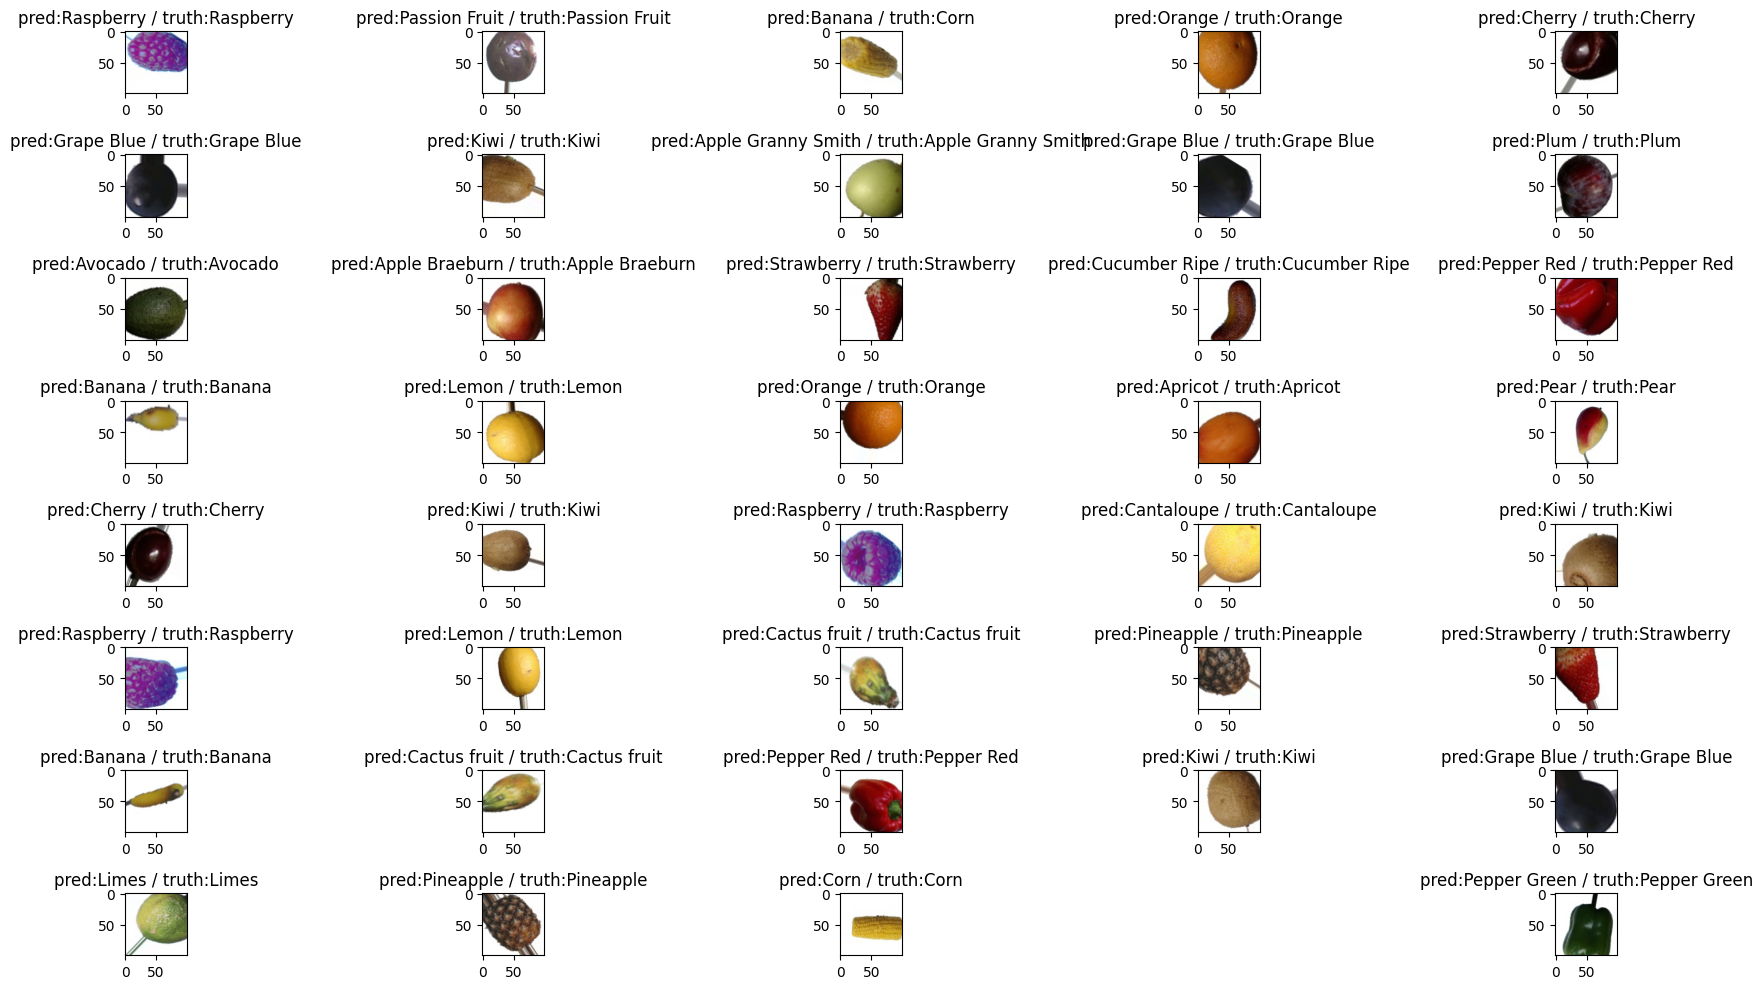

In [35]:
test_x, test_y = val_data.__getitem__(1)

preds = model.predict(test_x)

plt.figure(figsize=(20, 10))
for i in range(40):
    plt.subplot(8, 5, i+1)
    plt.title('pred:%s / truth:%s' % (classes[np.argmax(preds[i])], classes[np.argmax(test_y[i])]))
    plt.imshow(test_x[i])
    plt.tight_layout()